In [3]:
import pandas as pd
air_df=pd.read_excel("Airbnb_data.xlsx")
print(air_df.head())


         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

In [4]:
print(air_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
print(air_df.describe())

                 id     log_price  accommodates     bathrooms  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263   
std    6.081735e+06      0.717394      2.153589      0.582044   
min    3.440000e+02      0.000000      1.000000      0.000000   
25%    6.261964e+06      4.317488      2.000000      1.000000   
50%    1.225415e+07      4.709530      2.000000      1.000000   
75%    1.640226e+07      5.220356      4.000000      1.000000   
max    2.123090e+07      7.600402     16.000000      8.000000   

       host_response_rate      latitude     longitude  number_of_reviews  \
count        55812.000000  74111.000000  74111.000000       74111.000000   
mean             0.943520     38.445958    -92.397525          20.900568   
std              0.163418      3.080167     21.705322          37.828641   
min              0.000000     33.338905   -122.511500           0.000000   
25%              1.000000     34.1

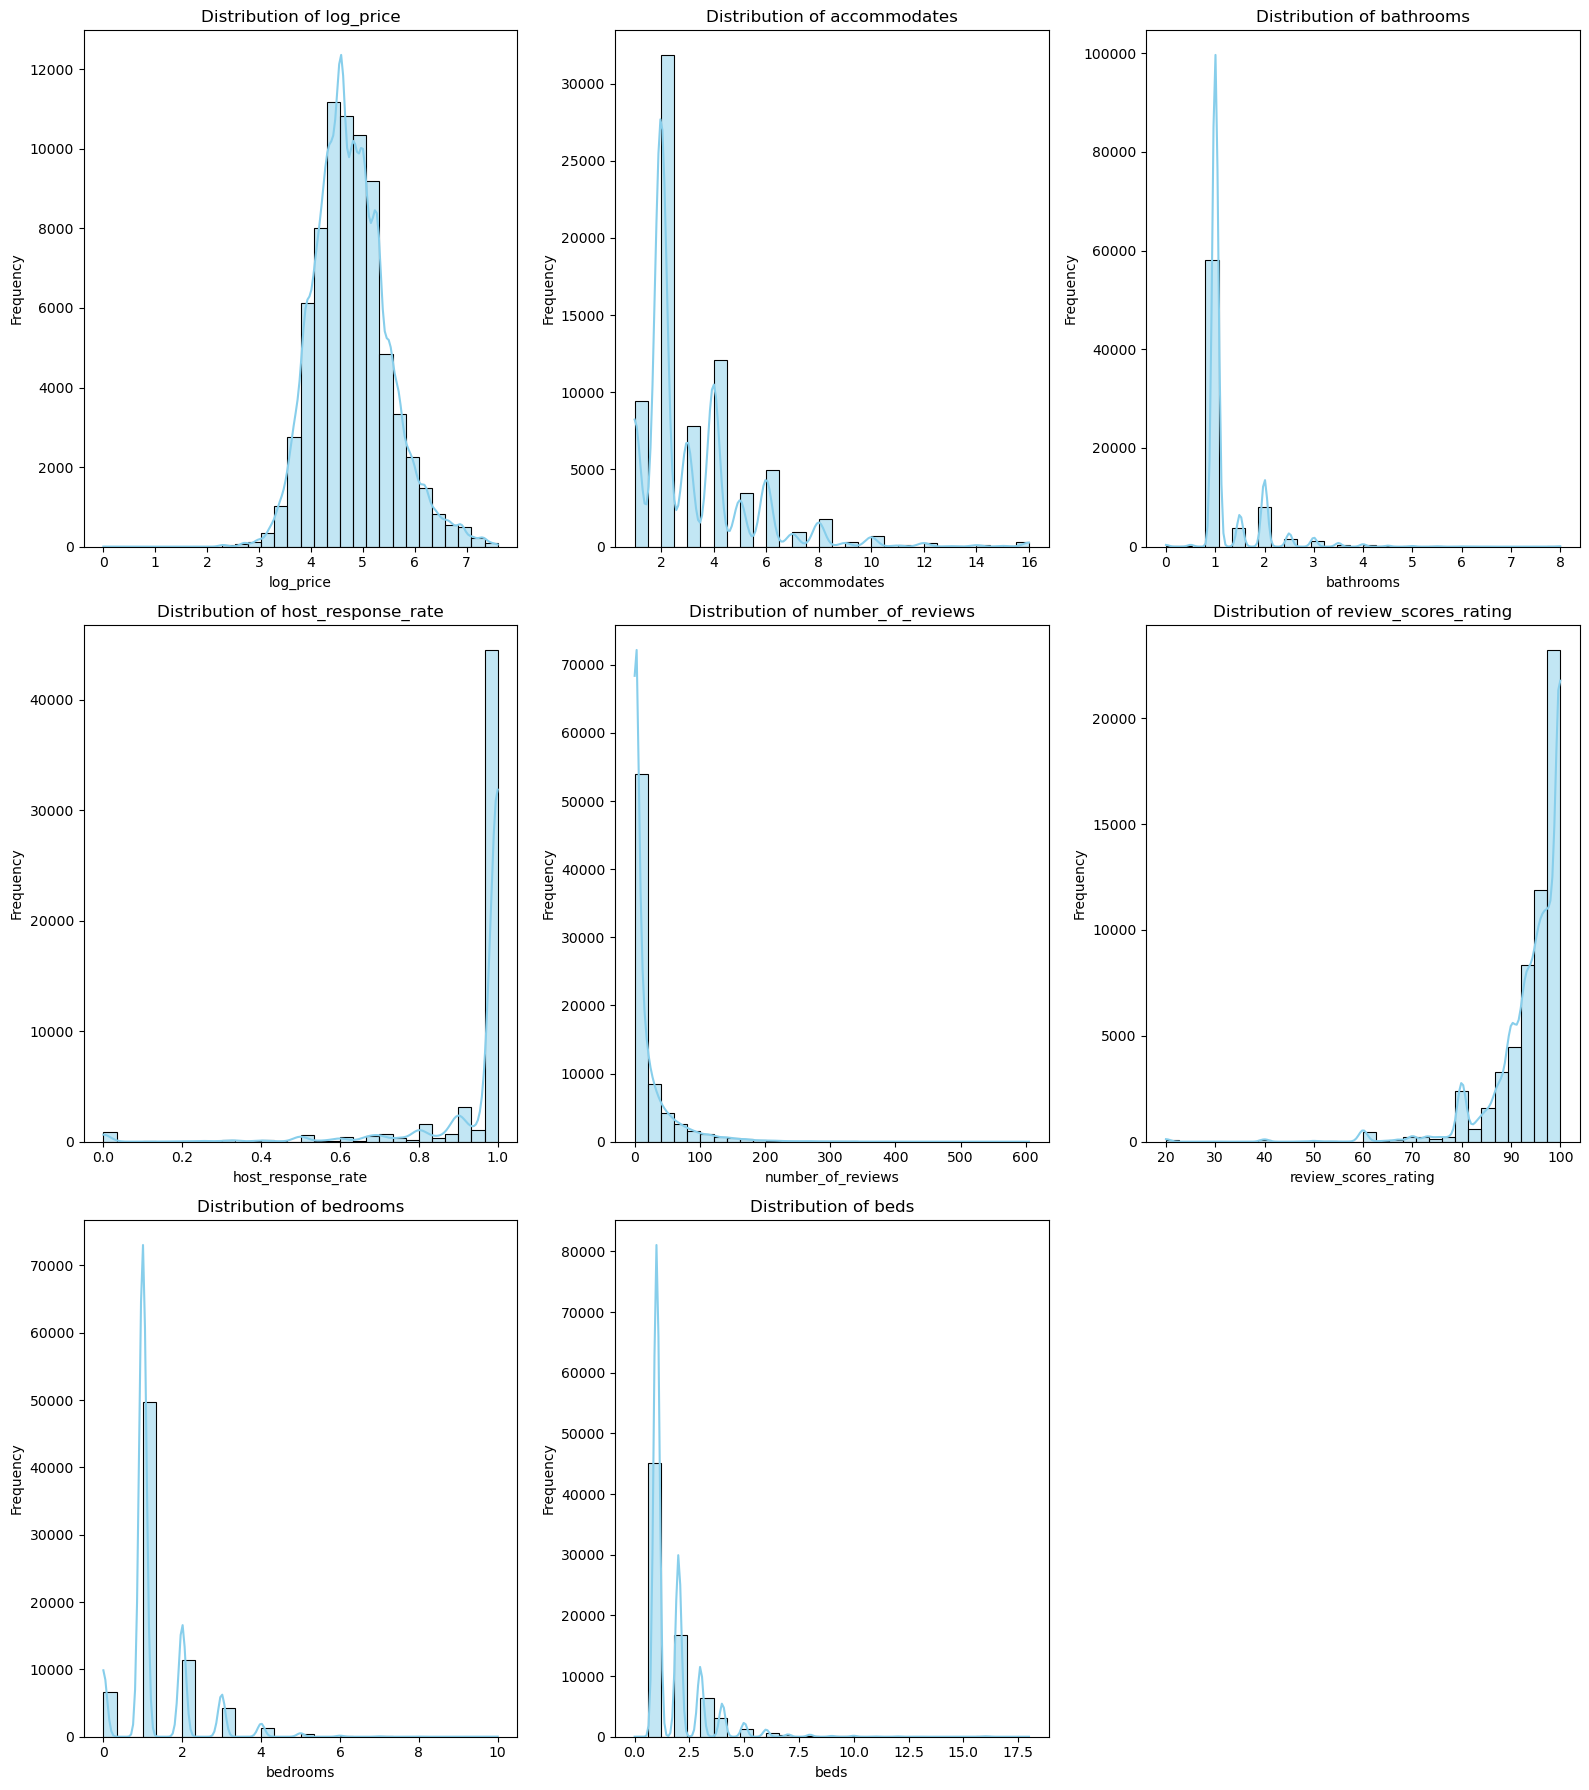

In [19]:
#Analyzing the trends from the data

import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['log_price', 'accommodates', 'bathrooms','host_response_rate', 'number_of_reviews', 'review_scores_rating','bedrooms','beds']
plt.figure(figsize=(16, 18))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(air_df[column].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [26]:
# categorical count of the each column for no-numerical data

categorical_columns = ['property_type', 'room_type', 'cancellation_policy']
categorical_counts = {col: air_df[col].value_counts() for col in categorical_columns}

categorical_counts


{'property_type': property_type
 Apartment             49003
 House                 16511
 Condominium            2658
 Townhouse              1692
 Loft                   1244
 Other                   607
 Guesthouse              498
 Bed & Breakfast         462
 Bungalow                366
 Villa                   179
 Dorm                    142
 Guest suite             123
 Camper/RV                94
 Timeshare                77
 Cabin                    72
 In-law                   71
 Hostel                   70
 Boutique hotel           69
 Boat                     65
 Serviced apartment       21
 Tent                     18
 Castle                   13
 Vacation home            11
 Yurt                      9
 Hut                       8
 Treehouse                 7
 Chalet                    6
 Earth House               4
 Tipi                      3
 Train                     2
 Cave                      2
 Casa particular           1
 Parking Space             1
 Lighthouse

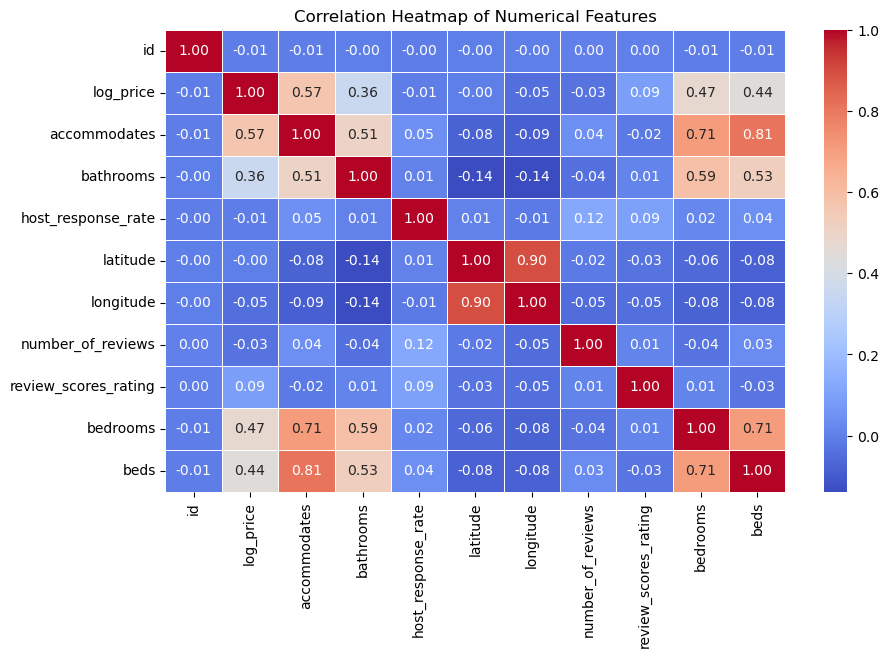

In [83]:
# Finding the relationships between the features

numeric_df = air_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

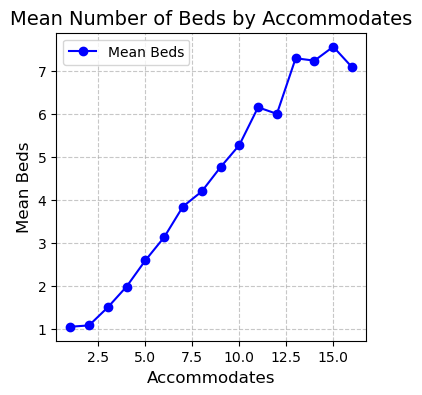

In [82]:
# Group by 'accommodates' and calculate the mean of 'beds'

grouped_data = air_df.groupby('accommodates')['beds'].mean().reset_index()

# Line chart for the grouped data
plt.figure(figsize=(4, 4))
plt.plot(grouped_data['accommodates'], grouped_data['beds'], marker='o', color='blue', label='Mean Beds')
plt.title('Mean Number of Beds by Accommodates', fontsize=14)
plt.xlabel('Accommodates', fontsize=12)
plt.ylabel('Mean Beds', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

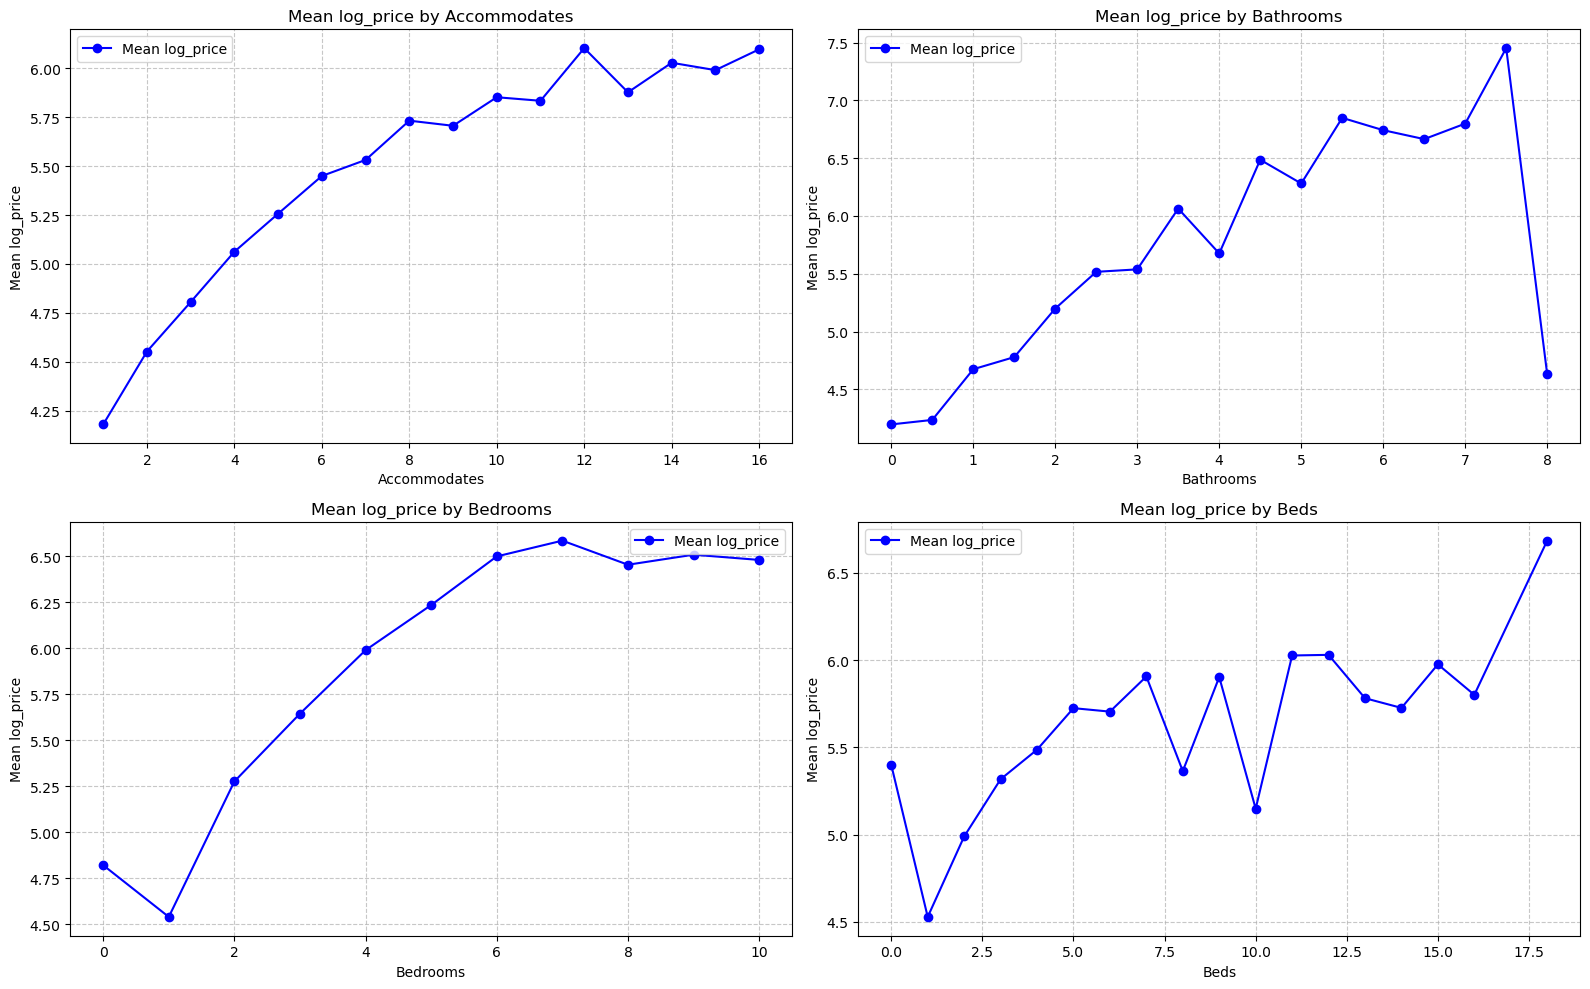

In [78]:
# Group by 'accommodates', 'bathrooms', 'bedrooms', 'beds' and calculate the mean of 'log_price'


# List of columns to group by
groupby_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

# Create a figure with subplots
plt.figure(figsize=(16, 10))

for i, column in enumerate(groupby_columns, 1):
    # Group by the column and calculate the mean of log_price
    grouped_data = air_df.groupby(column)['log_price'].mean().reset_index()

    plt.subplot(2, 2, i)
    plt.plot(grouped_data[column], grouped_data['log_price'], marker='o', color='blue', label=f'Mean log_price')
    plt.title(f'Mean log_price by {column.capitalize()}', fontsize=12)
    plt.xlabel(column.capitalize(), fontsize=10)
    plt.ylabel('Mean log_price', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

plt.tight_layout()
plt.show()

# because of the missing values their is some dips on the graphs 


In [85]:
#Missing Values
# Check missing values
print(air_df.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


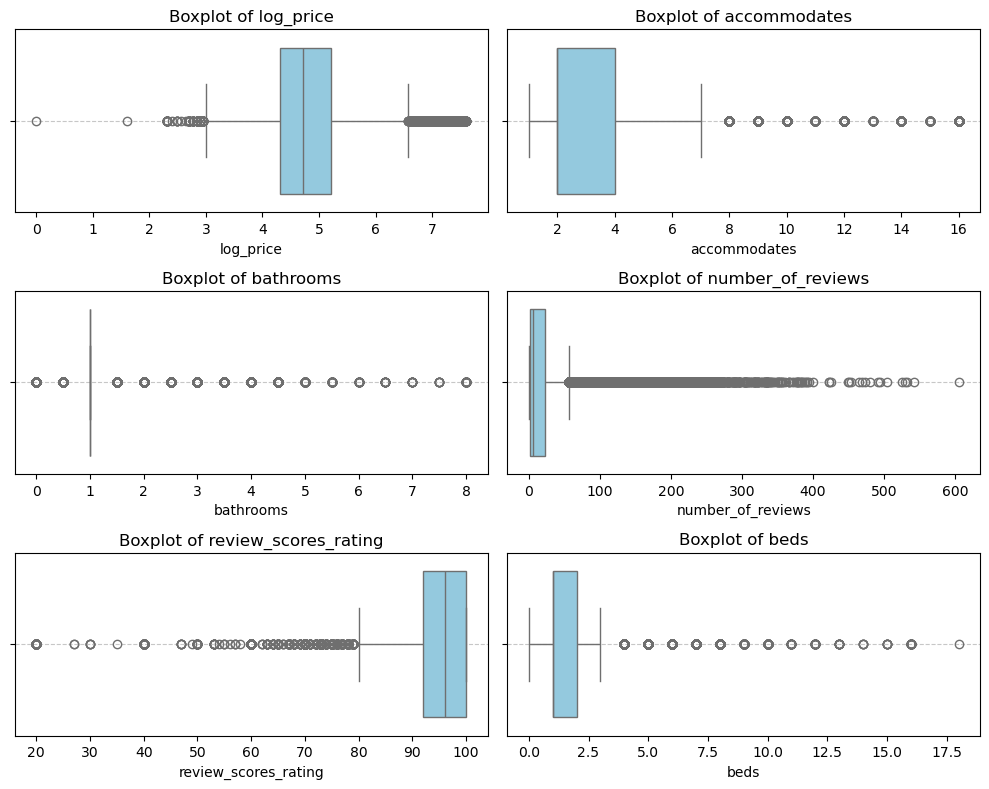

In [100]:
# Boxplots for numerical features

numerical_columns = ['log_price', 'accommodates', 'bathrooms','number_of_reviews', 'review_scores_rating','beds']

plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  
    sns.boxplot(x=air_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [115]:
# data cleaning.

# Fill missing numerical values with median
numerical_features=['log_price','accommodates','bathrooms','review_scores_rating','bedrooms','beds']
for col in numerical_features:
    air_df[col].fillna(air_df[col].median())

# Fill missing categorical values with mode or 'Unknown'
categorical_features = ['host_response_rate','property_type', 'room_type', 'cancellation_policy']
for col in categorical_features:
    air_df[col].fillna('Unknown')


# Drop columns that don't contribute to prediction
irrelevant_columns = ['id', 'name', 'thumbnail_url', 'description', 'zipcode', 'latitude', 'longitude','host_identity_verified','neighbourhood','host_has_profile_pic']
air_df.drop(columns=irrelevant_columns, inplace=True)


log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   0
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
first_review            15864
host_response_rate          0
host_since                188
instant_bookable            0
last_review             15827
number_of_reviews           0
review_scores_rating        0
bedrooms                    0
beds                        0
dtype: int64


In [124]:
#feature engineering
# Count the number of amenities 

air_df['amenities_count'] = air_df['amenities'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
print(air_df)

       log_price property_type        room_type  \
0       5.010635     Apartment  Entire home/apt   
1       5.129899     Apartment  Entire home/apt   
2       4.976734     Apartment  Entire home/apt   
3       6.620073         House  Entire home/apt   
4       4.744932     Apartment  Entire home/apt   
...          ...           ...              ...   
74106   4.605170     Apartment     Private room   
74107   5.043425     Apartment  Entire home/apt   
74108   5.220356     Apartment  Entire home/apt   
74109   5.273000     Apartment  Entire home/apt   
74110   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Intern

In [132]:
# Convert datetime columns to days-based numerical features
air_df['host_since'] = pd.to_datetime(air_df['host_since'], errors='coerce')
air_df['first_review'] = pd.to_datetime(air_df['first_review'], errors='coerce')
air_df['last_review'] = pd.to_datetime(air_df['last_review'], errors='coerce')


# Create new features
air_df['host_tenure_days'] = (pd.Timestamp.now() - air_df['host_since']).dt.days
air_df['review_frequency_days'] = (air_df['last_review'] - air_df['first_review']).dt.days
air_df['review_recency_days'] = (pd.Timestamp.now() - air_df['last_review']).dt.days

# Drop original datetime columns
air_df.drop(columns=['host_since', 'first_review', 'last_review'], inplace=True)

KeyError: 'host_since'

In [152]:
# Transformation of the dataset

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    sparse_threshold=0  
)

X_transformed = preprocessor.fit_transform(X)

categorical_transformed_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
transformed_columns = numerical_features + categorical_transformed_names

if X_transformed.shape[1] == len(transformed_columns):
    X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_columns)
    print("Transformed DataFrame:")
    print(X_transformed_df.head())
else:
    print("Mismatch between transformed data shape and column names!")


Transformed DataFrame:
   accommodates  bathrooms  number_of_reviews  review_scores_rating  \
0     -0.072041  -0.403569          -0.499640              0.791657   
1      1.785336  -0.403569          -0.393899             -0.216536   
2      0.856648  -0.403569          -0.288158             -0.360564   
3      0.392303  -0.403569          -0.552510              0.215547   
4     -0.536385  -0.403569          -0.446769             -7.850000   

   host_tenure_days  review_frequency_days  review_recency_days  \
0          1.266925              -0.780102             0.966838   
1         -1.593994              -0.565254            -0.823925   
2         -1.239186              -0.567244            -0.786618   
3         -0.408307                    NaN                  NaN   
4         -0.249617              -0.016198             0.187524   

   amenities_count  property_type_Apartment  property_type_Bed & Breakfast  \
0        -1.240094                      1.0                          

In [153]:
# model development
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 59288 samples
Testing set size: 14823 samples


In [172]:
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  

y_pred_linear = linear_model.predict(X_test)


In [173]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression RMSE: {rmse_linear:.2f}")
print(f"Linear Regression MAE: {mae_linear:.2f}")
print(f"Linear Regression R²: {r2_linear:.2f}")


Linear Regression RMSE: 4173545106.37
Linear Regression MAE: 34279703.91
Linear Regression R²: -33906172150279073792.00


In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

Random Forest RMSE: 0.48
Random Forest MAE: 0.36
Random Forest R²: 0.55


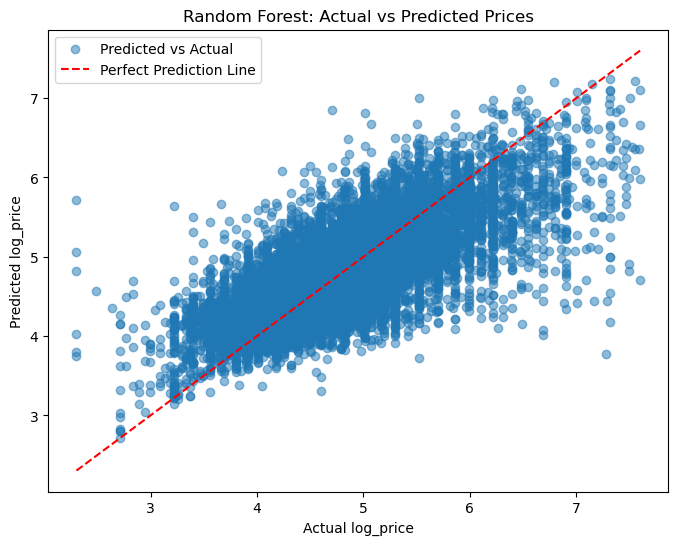

In [42]:
import matplotlib.pyplot as plt

# Random Forest: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")
plt.xlabel('Actual log_price')
plt.ylabel('Predicted log_price')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.legend()
plt.show()


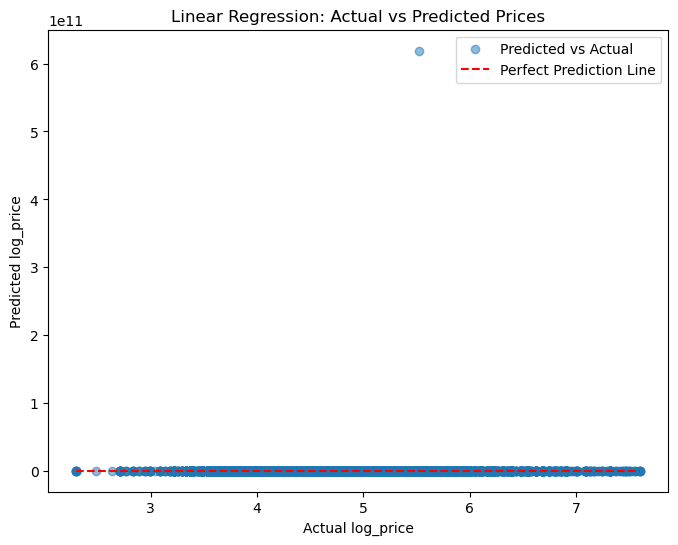

In [43]:
# Linear Regression: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")
plt.xlabel('Actual log_price')
plt.ylabel('Predicted log_price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()


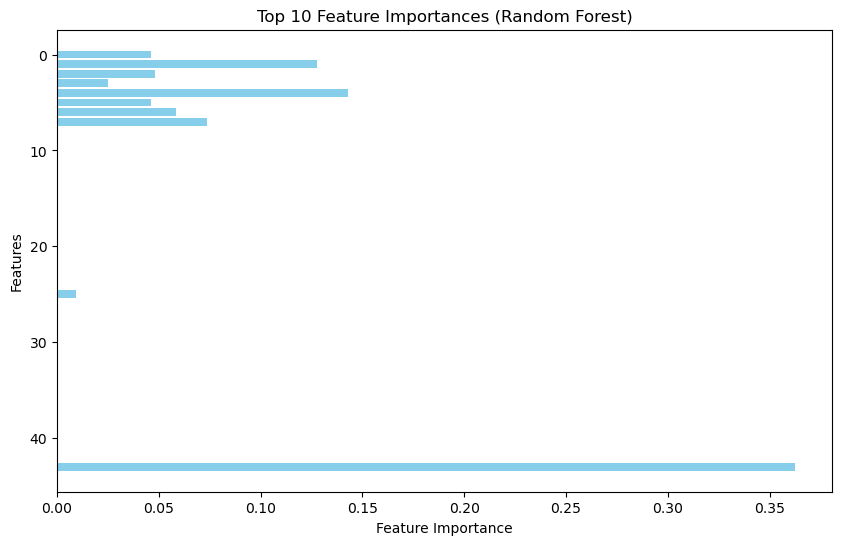

In [44]:
# Feature Importance for Random Forest
import numpy as np

importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices[:10]], importances[sorted_indices[:10]], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


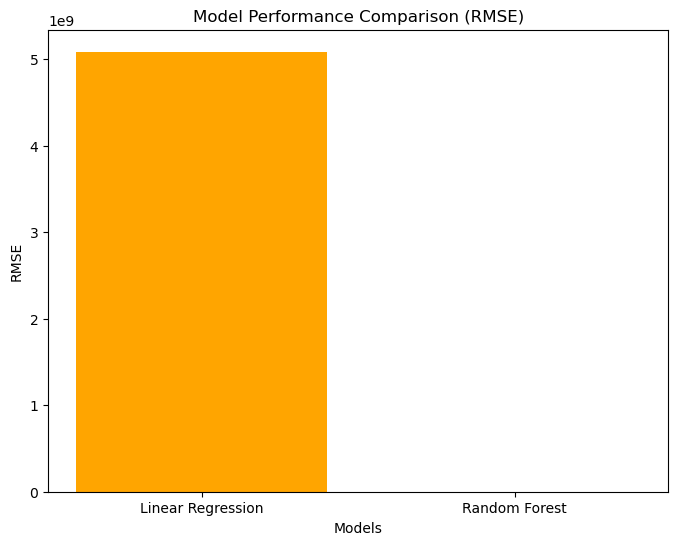

In [45]:
# Bar chart for RMSE comparison
models = ['Linear Regression', 'Random Forest']
rmse_values = [linear_rmse, rf_rmse]

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['orange', 'blue'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')
plt.show()
